# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# read csv file
mci_df = pd.read_csv("Medical_Cost_Insurance_MCI.csv")

#print dataframe 
mci_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\13148\AppData\Local\Temp\ipykernel_22376\551180655.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(mci_df.corr(), cmap="YlGnBu", annot = True)


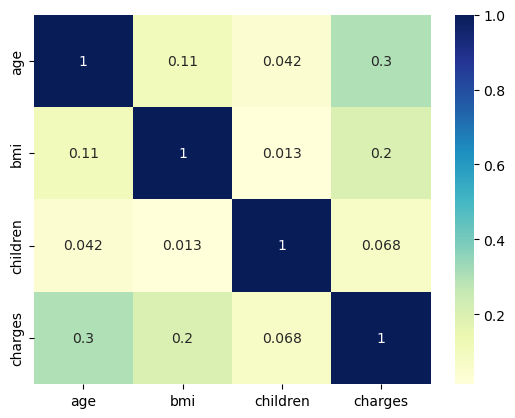

In [4]:
sb.heatmap(mci_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [8]:
X = mci_df['age']
y = mci_df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           2.18e-22
Time:                        14:35:51   Log-Likelihood:                -10082.
No. Observations:                 936   AIC:                         2.017e+04
Df Residuals:                     934   BIC:                         2.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2707.0518   1113.327      2.431      0.015     522.139    4891.965
age          267.7401     26.806      9.988      0.000     215.133     320.348
==============================================================================
Omnibus:                      284.664   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.549
Skew:                           1.743   Prob(JB):                    5.88e-134
Kurtosis:                       4.891   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

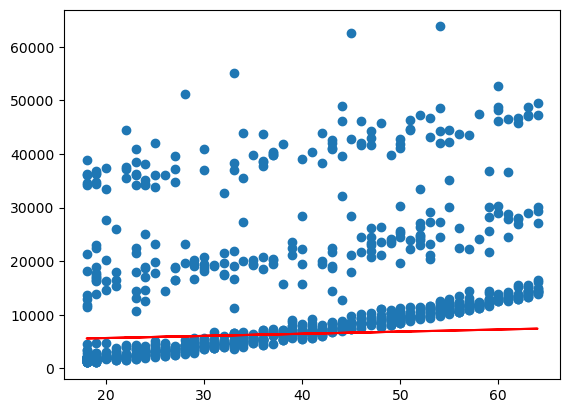

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 4891.2666 + 39.5907*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

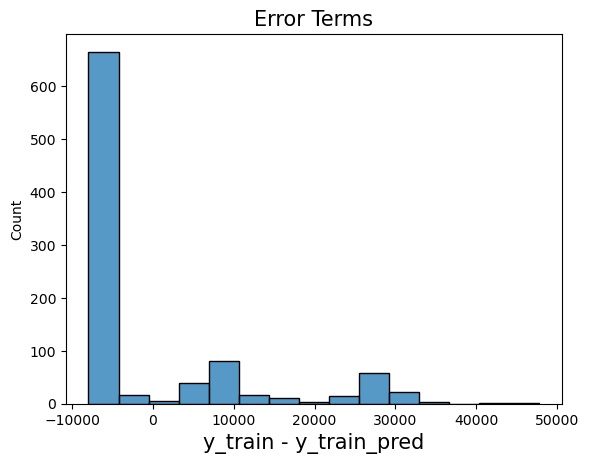

In [11]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sb.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.097
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really